In [1]:
import pandas as pd
import experiment_util as util
import models
import numpy as np
import random
import matplotlib.pyplot as plt
import plot_util as putil

np.random.seed(0)
random.seed(0)

In [2]:
raw_df=pd.read_csv("../Datasets/Kaggle/College/data.csv")

df=raw_df.copy()
#df = df.loc[~df.index.duplicated(keep='first')]
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


In [3]:
folds_index=np.array_split(df.sample(frac=1).index,5)
eval=util.evaluation(df,"gender","will_go_to_college","Male",folds_index)
pre_df=util.preporcess_transform(df)
result=pd.DataFrame([],columns=util.column)
result.columns.name="College"
result

College,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity


In [4]:
result=util.append_Series(result,eval.cross_validation("Random Forest",models.RandomForest,pre_df))
result

/home/kdai332/Documents/Ethical-Framework/Aequitas/experiment_util.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df=pd.concat([dataframe,pd.DataFrame([series.to_list()],index=[series.name],columns=column)])


College,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.904,0.984274,0.639754,1.033412,1.08961


In [5]:
result=util.append_Series(result,eval.cross_validation("Gradient Boost",models.GradientBoost,pre_df))
result

College,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.904,0.984274,0.639754,1.033412,1.089610
Gradient Boost,0.892,1.217328,0.758392,1.003850,1.056136


In [6]:
result=util.append_Series(result,eval.cross_validation("FairGBM",models.Fairgbm,pre_df))
result

College,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.904,0.984274,0.639754,1.033412,1.089610
Gradient Boost,0.892,1.217328,0.758392,1.003850,1.056136
FairGBM,0.815,1.225763,1.252017,1.055033,1.111747


In [7]:
result=util.append_Series(result,eval.cross_validation("FairLearn",models.Fairlearn,pre_df))
result

[INFO] 2024-02-14 16:33:11 methods.inprocessing.ExponentiatedGradient - Instantiating estimator '<class 'lightgbm.sklearn.LGBMClassifier'>' with parameters: {'boosting_type': 'dart', 'enable_bundle': False, 'n_estimators': 100, 'num_leaves': 10, 'min_child_samples': 50, 'learning_rate': 0.01, 'n_jobs': 1}.
[INFO] 2024-02-14 16:33:11 methods.inprocessing.ExponentiatedGradient - Instantiating constraint '<class 'fairlearn.reductions._moments.utility_parity.FalsePositiveRateParity'>' with parameters: {}.
[INFO] 2024-02-14 16:33:11 methods.inprocessing.ExponentiatedGradient - Instantiating reduction '<class 'fairlearn.reductions._exponentiated_gradient.exponentiated_gradient.ExponentiatedGradient'>' with parameters: {'eps': 0.05, 'max_iter': 10}.
[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] 

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.pos_basis[i]["+", e, g] = 1
/home/kdai332/.conda/envs/Aequitas-venv/

[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number o

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number o

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number o

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number o

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number o

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number o

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number o

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number o

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[INFO] 2024-02-14 16:33:14

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, 

[LightGBM] [Info] Number of positive: 402, number of negative: 398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502500 -> initscore=0.010000
[LightGBM] [Info] Start training from score 0.010000
[LightGBM] [Info] Number of positive: 402, number of negative: 398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502500 -> initscore=0.010000
[LightGBM] [Info] Start training from score 0.010000
[LightGBM] [Info] Number of po

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 402, number of negative: 398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502500 -> initscore=0.010000
[LightGBM] [Info] Start training from score 0.010000
[LightGBM] [Info] Number of positive: 402, number of negative: 398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502500 -> initscore=0.010000
[LightGBM] [Info] Start training from score 0.010000
[LightGBM] [Info] Number of po

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 402, number of negative: 398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502500 -> initscore=0.010000
[LightGBM] [Info] Start training from score 0.010000
[LightGBM] [Info] Number of positive: 402, number of negative: 398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502500 -> initscore=0.010000
[LightGBM] [Info] Start training from score 0.010000
[LightGBM] [Info] Number of po

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 402, number of negative: 398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502500 -> initscore=0.010000
[LightGBM] [Info] Start training from score 0.010000
[LightGBM] [Info] Number of positive: 589, number of negative: 211
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501864 -> initscore=0.007455
[LightGBM] [Info] Start training from score 0.007455
[LightGBM] [Warning] No furthe

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 402, number of negative: 398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502500 -> initscore=0.010000
[LightGBM] [Info] Start training from score 0.010000
[LightGBM] [Info] Number of positive: 402, number of negative: 398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502500 -> initscore=0.010000
[LightGBM] [Info] Start training from score 0.010000
[LightGBM] [Info] Number of po

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number o

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number o

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number o

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number o

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number o

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number o

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-cho

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number o

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number of positive: 397, number of negative: 403
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496250 -> initscore=-0.015000
[LightGBM] [Info] Start training from score -0.015000
[LightGBM] [Info] Number o

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You 

[LightGBM] [Info] Number of positive: 405, number of negative: 395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506250 -> initscore=0.025001
[LightGBM] [Info] Start training from score 0.025001
[LightGBM] [Info] Number of positive: 405, number of negative: 395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506250 -> initscore=0.025001
[LightGBM] [Info] Start training from score 0.025001
[LightGBM] [Info] Number of po

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 405, number of negative: 395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506250 -> initscore=0.025001
[LightGBM] [Info] Start training from score 0.025001
[LightGBM] [Info] Number of positive: 405, number of negative: 395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506250 -> initscore=0.025001
[LightGBM] [Info] Start training from score 0.025001
[LightGBM] [Info] Number of po

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 405, number of negative: 395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506250 -> initscore=0.025001
[LightGBM] [Info] Start training from score 0.025001
[LightGBM] [Info] Number of positive: 405, number of negative: 395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506250 -> initscore=0.025001
[LightGBM] [Info] Start training from score 0.025001
[LightGBM] [Info] Number of po

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 582, number of negative: 218
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501442 -> initscore=0.005767
[LightGBM] [Info] Start training from score 0.005767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 582, number of negative: 218
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504760 -> initscore=0.019041
[LightGBM] [Info] Start training from score 0.019041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 405, number of negative: 395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506250 -> initscore=0.025001
[LightGBM] [Info] Start training from score 0.025001
[LightGBM] [Info] Number of positive: 582, number of negative: 218
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 799
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504742 -> initscore=0.018968
[LightGBM] [Info] Start training from score 0.018968
[LightGBM] [Warning] No furthe

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, 

[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number of positive: 590, number of negative: 210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499883 -> initscore=-0.000467
[LightGBM] [Info] Start training from score -0.000467
[LightGBM] [Warning] No fu

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 590, number of negative: 210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497886 -> initscore=-0.008454
[LightGBM] [Info] Start training from score -0.008454
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number of positive: 590, number of negative: 210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498136 -> initscore=-0.007455
[LightGBM] [Info] Start training from score -0.007455
[LightGBM] [Warning] No fu

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is depr

[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000
[LightGBM] [Info] Number of positive: 398, number of negative: 402
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497500 -> initscore=-0.010000
[LightGBM] [Info] Start training from score -0.010000


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]
/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


College,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.904,0.984274,0.639754,1.033412,1.089610
Gradient Boost,0.892,1.217328,0.758392,1.003850,1.056136
FairGBM,0.815,1.225763,1.252017,1.055033,1.111747
FairLearn,0.842,1.281027,0.902060,1.022301,1.082331


/home/kdai332/Documents/Ethical-Framework/Aequitas/plot_util.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x[i]-x_range*0.15,y[i]+y_range*0.02,annotations[i])


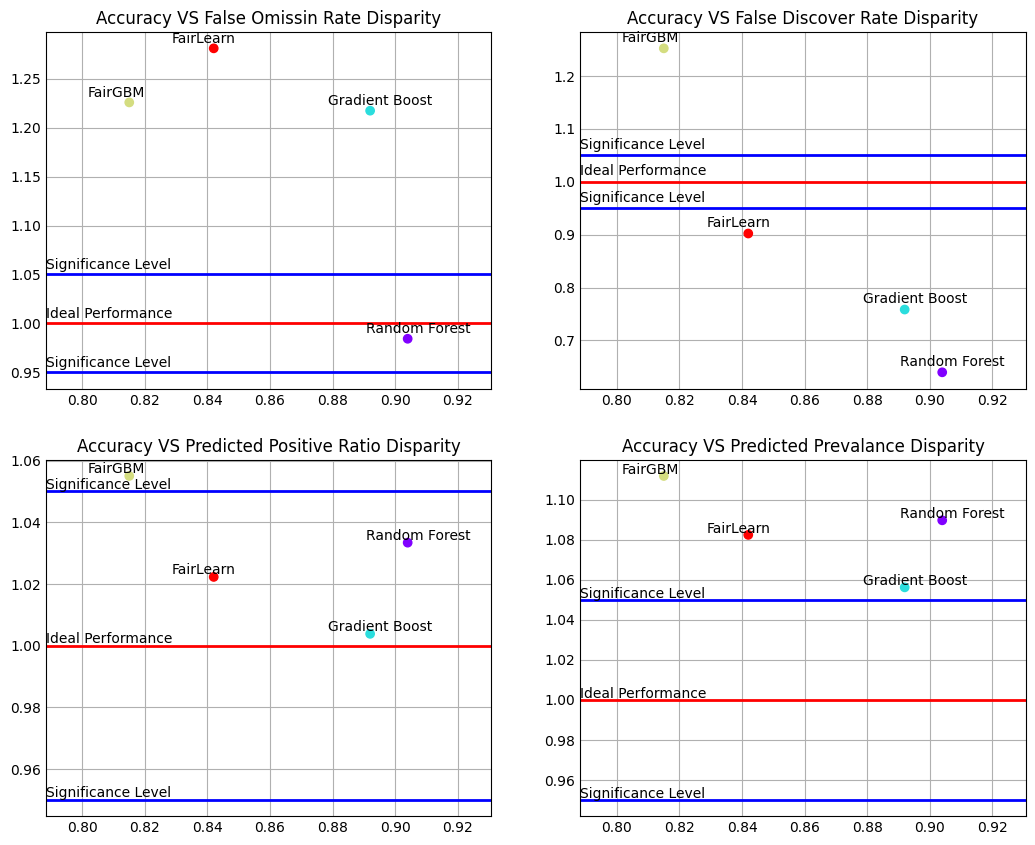

In [8]:
plt.style.use('_mpl-gallery')


# plot
fig, ax = plt.subplots(2,2,figsize=(10,8))

putil.plot_scatter(ax[0][0],result["Accuracy"],result["False Omissin Rate Disparity"],"Accuracy VS False Omissin Rate Disparity",result.index)
putil.plot_scatter(ax[0][1],result["Accuracy"],result["False Discover Rate Disparity"],"Accuracy VS False Discover Rate Disparity",result.index)
putil.plot_scatter(ax[1][0],result["Accuracy"],result["Predicted Positive Ratio Disparity"],"Accuracy VS Predicted Positive Ratio Disparity",result.index)
putil.plot_scatter(ax[1][1],result["Accuracy"],result["Predicted Prevalance Disparity"],"Accuracy VS Predicted Prevalance Disparity",result.index)

plt.show()